# ADP1 Essentiality Analysis

This notebook analyzes gene essentiality data from TNseq experiments and compares it with mutant growth rate data.

## 1. Load Essential Genes Data and Build Gene Translation

In [1]:
%run util.py

# Load the essential genes data
essential_df = pd.read_csv("data/EssentialGenes.csv")
print(f"Loaded {len(essential_df)} genes from EssentialGenes.csv")
print(f"\nColumns: {essential_df.columns.tolist()}")
print(f"\nEssentiality categories in minimal media: {essential_df['KO.essentiality.minimal'].unique()}")
print(f"Essentiality categories in LB: {essential_df['tnseq.essentiality.LB'].unique()}")

# Show sample data
essential_df.head(10)

/Users/chenry/Dropbox/Projects/KBUtilLib/src
modelseedpy 0.4.2


2025-12-18 10:59:30,253 - __main__.NotebookUtil - INFO - Loaded configuration from: /Users/chenry/.kbutillib/config.yaml
2025-12-18 10:59:30,255 - __main__.NotebookUtil - INFO - Loaded 0 tokens from /Users/chenry/.tokens
2025-12-18 10:59:30,256 - __main__.NotebookUtil - INFO - Loaded kbase tokens from /Users/chenry/.kbase/token


loading biochemistry database from /Users/chenry/Dropbox/Projects/ModelSEEDDatabase


2025-12-18 10:59:35,172 - __main__.NotebookUtil - INFO - ModelSEED database loaded from /Users/chenry/Dropbox/Projects/ModelSEEDDatabase
2025-12-18 10:59:35,571 - __main__.NotebookUtil - WARNING - BLAST tools not found. Install NCBI BLAST+ to use BLAST functionality. On Ubuntu/Debian: sudo apt-get install ncbi-blast+, On MacOS: brew install blast
2025-12-18 10:59:35,573 - __main__.NotebookUtil - INFO - Notebook environment detected
2025-12-18 10:59:35,573 - __main__.NotebookUtil - INFO - ArgoGatewayClient initialised | model=gpto3mini env=dev timeout=120.0s url=https://apps-dev.inside.anl.gov/argoapi/api/v1/resource/streamchat/


cobrakbase 0.4.0
/Users/chenry/.npm-global/bin/claude


2025-12-18 10:59:36,451 - __main__.NotebookUtil - INFO - AICurationUtils initialized with backend: claude-code


Loaded 3405 genes from EssentialGenes.csv

Columns: ['id', 'gene', 'start', 'end', 'strand', 'type', 'cog', 'description', 'KO.essentiality.minimal', 'tnseq.essentiality.LB', 'tnseq.numsites', 'tnseq.deseq.base.mean', 'tnseq.deseq.log2fc', 'tnseq.deseq.padj', 'tnseq.mclust.uncertainty']

Essentiality categories in minimal media: ['Uncertain' 'Essential' 'Dispensable']
Essentiality categories in LB: ['Essential' 'Dispensable' 'Uncertain']


,id,gene,start,end,strand,type,cog,description,KO.essentiality.minimal,tnseq.essentiality.LB,tnseq.numsites,tnseq.deseq.base.mean,tnseq.deseq.log2fc,tnseq.deseq.padj,tnseq.mclust.uncertainty
0,ACIAD0001,dnaA,201,1598,1,CDS,L,chromosome replication initiator DnaA,Uncertain,Essential,1,217.930114,-5.810593,3.390000e-05,0.000998
1,ACIAD0002,dnaN,1834,2982,1,CDS,L,DNA polymerase III beta,Essential,Essential,1,173.412373,-5.049461,1.077230e-04,0.005265
2,ACIAD0003,recF,2998,4074,1,CDS,L,recombination protein F,Dispensable,Dispensable,34,210.693324,1.081815,5.115214e-01,0.000000
3,ACIAD0004,gyrB,4127,6595,1,CDS,L,"DNA gyrase, subunit B (type II topoisomerase)",Essential,Essential,0,378.217011,-7.340679,3.930000e-07,0.000035
4,ACIAD0005,ACIAD0005,6712,6948,-1,CDS,S,hypothetical protein,Dispensable,Dispensable,3,35.037359,-2.352115,2.822771e-01,0.339209
5,ACIAD0006,ACIAD0006,6969,7139,1,CDS,-,hypothetical protein,Dispensable,Dispensable,3,30.264709,-1.595147,5.601449e-01,0.089085
6,ACIAD0007,ACIAD0007,7336,9270,-1,CDS,S,ABC transporter ATP-binding protein,Dispensable,Dispensable,42,308.189085,1.979251,4.276151e-02,0.000000
7,ACIAD0008,ACIAD0008,9651,10661,1,CDS,P,RND type efflux pump,Dispensable,Dispensable,50,179.067705,1.695366,2.959137e-01,0.000000
8,ACIAD0009,adeT,10910,11920,1,CDS,P,RND type efflux pump involved in aminoglycosid...,Dispensable,Dispensable,52,178.179210,2.830803,1.667103e-02,0.000000
9,ACIAD0010,ACIAD0010,12039,12374,1,CDS,C,iron-sulfur cluster insertion protein ErpA,Essential,Uncertain,1,41.682394,-3.415763,8.361688e-02,0.159366


## 2. Build Lists of Essential Genes in LB and Minimal Media

In [3]:
%run util.py

# Build lists of essential genes with translated IDs
gene_translation = util.load("adp1_gene_translation")

# Essential in minimal media
essential_minimal_old = essential_df[essential_df['KO.essentiality.minimal'] == 'Essential']['id'].tolist()
essential_minimal = [gene_translation.get(g, g) for g in essential_minimal_old]

# Essential in LB
essential_lb_old = essential_df[essential_df['tnseq.essentiality.LB'] == 'Essential']['id'].tolist()
essential_lb = [gene_translation.get(g, g) for g in essential_lb_old]

# Uncertain genes (for reference)
uncertain_minimal_old = essential_df[essential_df['KO.essentiality.minimal'] == 'Uncertain']['id'].tolist()
uncertain_minimal = [gene_translation.get(g, g) for g in uncertain_minimal_old]

uncertain_lb_old = essential_df[essential_df['tnseq.essentiality.LB'] == 'Uncertain']['id'].tolist()
uncertain_lb = [gene_translation.get(g, g) for g in uncertain_lb_old]

# Dispensable genes
dispensable_minimal_old = essential_df[essential_df['KO.essentiality.minimal'] == 'Dispensable']['id'].tolist()
dispensable_minimal = [gene_translation.get(g, g) for g in dispensable_minimal_old]

dispensable_lb_old = essential_df[essential_df['tnseq.essentiality.LB'] == 'Dispensable']['id'].tolist()
dispensable_lb = [gene_translation.get(g, g) for g in dispensable_lb_old]

print("Essential Genes Summary:")
print("=" * 60)
print(f"\nMinimal Media:")
print(f"  Essential: {len(essential_minimal)} genes")
print(f"  Uncertain: {len(uncertain_minimal)} genes")
print(f"  Dispensable: {len(dispensable_minimal)} genes")
print(f"\nLB Media:")
print(f"  Essential: {len(essential_lb)} genes")
print(f"  Uncertain: {len(uncertain_lb)} genes")
print(f"  Dispensable: {len(dispensable_lb)} genes")

# Find genes essential in both conditions
essential_both = set(essential_minimal) & set(essential_lb)
essential_minimal_only = set(essential_minimal) - set(essential_lb)
essential_lb_only = set(essential_lb) - set(essential_minimal)

print(f"\nOverlap Analysis:")
print(f"  Essential in BOTH: {len(essential_both)} genes")
print(f"  Essential in Minimal ONLY: {len(essential_minimal_only)} genes")
print(f"  Essential in LB ONLY: {len(essential_lb_only)} genes")

# Save essential gene lists
essentiality_data = {
    "essential_minimal": essential_minimal,
    "essential_lb": essential_lb,
    "uncertain_minimal": uncertain_minimal,
    "uncertain_lb": uncertain_lb,
    "dispensable_minimal": dispensable_minimal,
    "dispensable_lb": dispensable_lb,
    "essential_both": list(essential_both),
    "essential_minimal_only": list(essential_minimal_only),
    "essential_lb_only": list(essential_lb_only)
}
util.save("essentiality_gene_lists", essentiality_data)
print("\nEssential gene lists saved to datacache/essentiality_gene_lists.json")

2025-12-18 11:06:18,820 - __main__.NotebookUtil - INFO - Loaded configuration from: /Users/chenry/.kbutillib/config.yaml
2025-12-18 11:06:18,820 - __main__.NotebookUtil - INFO - Loaded 0 tokens from /Users/chenry/.tokens
2025-12-18 11:06:18,821 - __main__.NotebookUtil - INFO - Loaded kbase tokens from /Users/chenry/.kbase/token
2025-12-18 11:06:18,822 - __main__.NotebookUtil - INFO - ModelSEED database loaded from /Users/chenry/Dropbox/Projects/ModelSEEDDatabase


/Users/chenry/Dropbox/Projects/KBUtilLib/src


2025-12-18 11:06:19,202 - __main__.NotebookUtil - WARNING - BLAST tools not found. Install NCBI BLAST+ to use BLAST functionality. On Ubuntu/Debian: sudo apt-get install ncbi-blast+, On MacOS: brew install blast
2025-12-18 11:06:19,203 - __main__.NotebookUtil - INFO - Notebook environment detected
2025-12-18 11:06:19,203 - __main__.NotebookUtil - INFO - ArgoGatewayClient initialised | model=gpto3mini env=dev timeout=120.0s url=https://apps-dev.inside.anl.gov/argoapi/api/v1/resource/streamchat/


/Users/chenry/.npm-global/bin/claude


2025-12-18 11:06:19,802 - __main__.NotebookUtil - INFO - AICurationUtils initialized with backend: claude-code


Essential Genes Summary:

Minimal Media:
  Essential: 499 genes
  Uncertain: 313 genes
  Dispensable: 2593 genes

LB Media:
  Essential: 346 genes
  Uncertain: 452 genes
  Dispensable: 2607 genes

Overlap Analysis:
  Essential in BOTH: 238 genes
  Essential in Minimal ONLY: 261 genes
  Essential in LB ONLY: 108 genes

Essential gene lists saved to datacache/essentiality_gene_lists.json


## 3. Build Dictionary of TNseq Parameters

In [4]:
# Build dictionary of TNseq parameters for all genes
# Structure: {translated_gene_id: {parameter: value, ...}}

tnseq_params = {}

for _, row in essential_df.iterrows():
    old_id = row['id']
    translated_id = gene_translation.get(old_id, old_id)
    
    tnseq_params[translated_id] = {
        "old_locus_tag": old_id,
        "gene_name": row['gene'],
        "description": row['description'],
        "type": row['type'],
        "cog": row['cog'],
        "start": int(row['start']),
        "end": int(row['end']),
        "strand": int(row['strand']),
        "essentiality_minimal": row['KO.essentiality.minimal'],
        "essentiality_LB": row['tnseq.essentiality.LB'],
        "tnseq_numsites": row['tnseq.numsites'] if pd.notna(row['tnseq.numsites']) else None,
        "tnseq_deseq_base_mean": row['tnseq.deseq.base.mean'] if pd.notna(row['tnseq.deseq.base.mean']) else None,
        "tnseq_deseq_log2fc": row['tnseq.deseq.log2fc'] if pd.notna(row['tnseq.deseq.log2fc']) else None,
        "tnseq_deseq_padj": row['tnseq.deseq.padj'] if pd.notna(row['tnseq.deseq.padj']) else None,
        "tnseq_mclust_uncertainty": row['tnseq.mclust.uncertainty'] if pd.notna(row['tnseq.mclust.uncertainty']) else None
    }

print(f"Built TNseq parameters dictionary for {len(tnseq_params)} genes")

# Show sample entry
sample_gene = list(tnseq_params.keys())[0]
print(f"\nSample entry for {sample_gene}:")
for key, value in tnseq_params[sample_gene].items():
    print(f"  {key}: {value}")

# Save TNseq parameters
util.save("tnseq_parameters", tnseq_params)
print(f"\nTNseq parameters saved to datacache/tnseq_parameters.json")

Built TNseq parameters dictionary for 3405 genes

Sample entry for ACIAD_RS00005:
  old_locus_tag: ACIAD0001
  gene_name: dnaA
  description: chromosome replication initiator DnaA
  type: CDS
  cog: L
  start: 201
  end: 1598
  strand: 1
  essentiality_minimal: Uncertain
  essentiality_LB: Essential
  tnseq_numsites: 1
  tnseq_deseq_base_mean: 217.9301139
  tnseq_deseq_log2fc: -5.810592771
  tnseq_deseq_padj: 3.39e-05
  tnseq_mclust_uncertainty: 0.00099827

TNseq parameters saved to datacache/tnseq_parameters.json


## 4. Load Mutant Growth Rate Data

In [5]:
# Load the mutant growth rate data
raw_expression = MSExpression.from_spreadsheet(
    filename="data/MutantGrowthRatesData.xls",
    sheet_name="Mutant growth phenotypes",
    skiprows=0,
    type="NormalizedRatios",
    id_column="Locus tag",
    id_translation=gene_translation
)

# Get the dataframe
mutant_df = raw_expression._data
print(f"Loaded mutant growth rate data for {len(mutant_df)} genes")
print(f"Conditions: {mutant_df.columns.tolist()}")

# Show sample
mutant_df.head()

Locus tag
['Locus tag', 'acetate', 'asparagine', 'butanediol', 'glucarate', 'glucose', 'lactate', 'quinate', 'urea']
Loaded mutant growth rate data for 2350 genes
Conditions: ['acetate', 'asparagine', 'butanediol', 'glucarate', 'glucose', 'lactate', 'quinate', 'urea']


,acetate,asparagine,butanediol,glucarate,glucose,lactate,quinate,urea
feature_id,,,,,,,,
ACIAD_RS00015,0.492069,0.891983,0.508448,1.299052,0.697673,0.679482,1.330775,0.416121
ACIAD_RS00025,0.494655,0.857759,0.608017,1.245431,1.230000,0.798621,1.340520,0.366121
ACIAD0006,0.672413,0.823449,0.689655,1.400690,1.378105,0.868793,1.451550,0.409397
ACIAD_RS00030,0.470344,0.804569,0.622587,1.220344,1.228275,0.809224,1.410000,0.402241
ACIAD_RS00035,0.500690,0.798879,0.567241,1.200690,1.300860,0.780776,1.353710,0.433966


## 5. Compare Essentiality Data with Mutant Growth Rate Data

In [6]:
# Find overlap between essential genes and mutant growth rate data
mutant_genes = set(mutant_df.index.tolist())
essential_minimal_set = set(essential_minimal)
essential_lb_set = set(essential_lb)

# Overlap analysis
overlap_minimal = mutant_genes & essential_minimal_set
overlap_lb = mutant_genes & essential_lb_set
overlap_both = mutant_genes & essential_both

print("Overlap between Essential Genes and Mutant Growth Rate Data:")
print("=" * 70)
print(f"\nTotal genes in mutant growth rate data: {len(mutant_genes)}")
print(f"Total genes in essentiality data: {len(tnseq_params)}")
print(f"\nEssential in Minimal Media:")
print(f"  Total essential genes: {len(essential_minimal_set)}")
print(f"  Genes with mutant growth data: {len(overlap_minimal)}")
print(f"  Overlap percentage: {100*len(overlap_minimal)/len(essential_minimal_set):.1f}%")
print(f"\nEssential in LB:")
print(f"  Total essential genes: {len(essential_lb_set)}")
print(f"  Genes with mutant growth data: {len(overlap_lb)}")
print(f"  Overlap percentage: {100*len(overlap_lb)/len(essential_lb_set):.1f}%")
print(f"\nEssential in Both Conditions:")
print(f"  Total genes essential in both: {len(essential_both)}")
print(f"  Genes with mutant growth data: {len(overlap_both)}")
print(f"  Overlap percentage: {100*len(overlap_both)/len(essential_both):.1f}%")

# Save overlap data
overlap_data = {
    "overlap_minimal": list(overlap_minimal),
    "overlap_lb": list(overlap_lb),
    "overlap_both": list(overlap_both),
    "mutant_genes": list(mutant_genes),
    "stats": {
        "total_mutant_genes": len(mutant_genes),
        "total_essential_minimal": len(essential_minimal_set),
        "total_essential_lb": len(essential_lb_set),
        "overlap_minimal_count": len(overlap_minimal),
        "overlap_lb_count": len(overlap_lb),
        "overlap_both_count": len(overlap_both)
    }
}
util.save("essentiality_mutant_overlap", overlap_data)
print("\nOverlap data saved to datacache/essentiality_mutant_overlap.json")

Overlap between Essential Genes and Mutant Growth Rate Data:

Total genes in mutant growth rate data: 2350
Total genes in essentiality data: 3405

Essential in Minimal Media:
  Total essential genes: 499
  Genes with mutant growth data: 0
  Overlap percentage: 0.0%

Essential in LB:
  Total essential genes: 346
  Genes with mutant growth data: 78
  Overlap percentage: 22.5%

Essential in Both Conditions:
  Total genes essential in both: 238
  Genes with mutant growth data: 0
  Overlap percentage: 0.0%

Overlap data saved to datacache/essentiality_mutant_overlap.json


## 6. Plot Distribution of Mutant Growth Rates for Essential vs All Genes

/opt/anaconda3/envs/modelseed/lib/python3.9/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/envs/modelseed/lib/python3.9/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/envs/modelseed/lib/python3.9/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/envs/modelseed/lib/python3.9/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/envs/modelseed/lib/python3.9/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/envs/modelseed/lib/python3.9/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
 

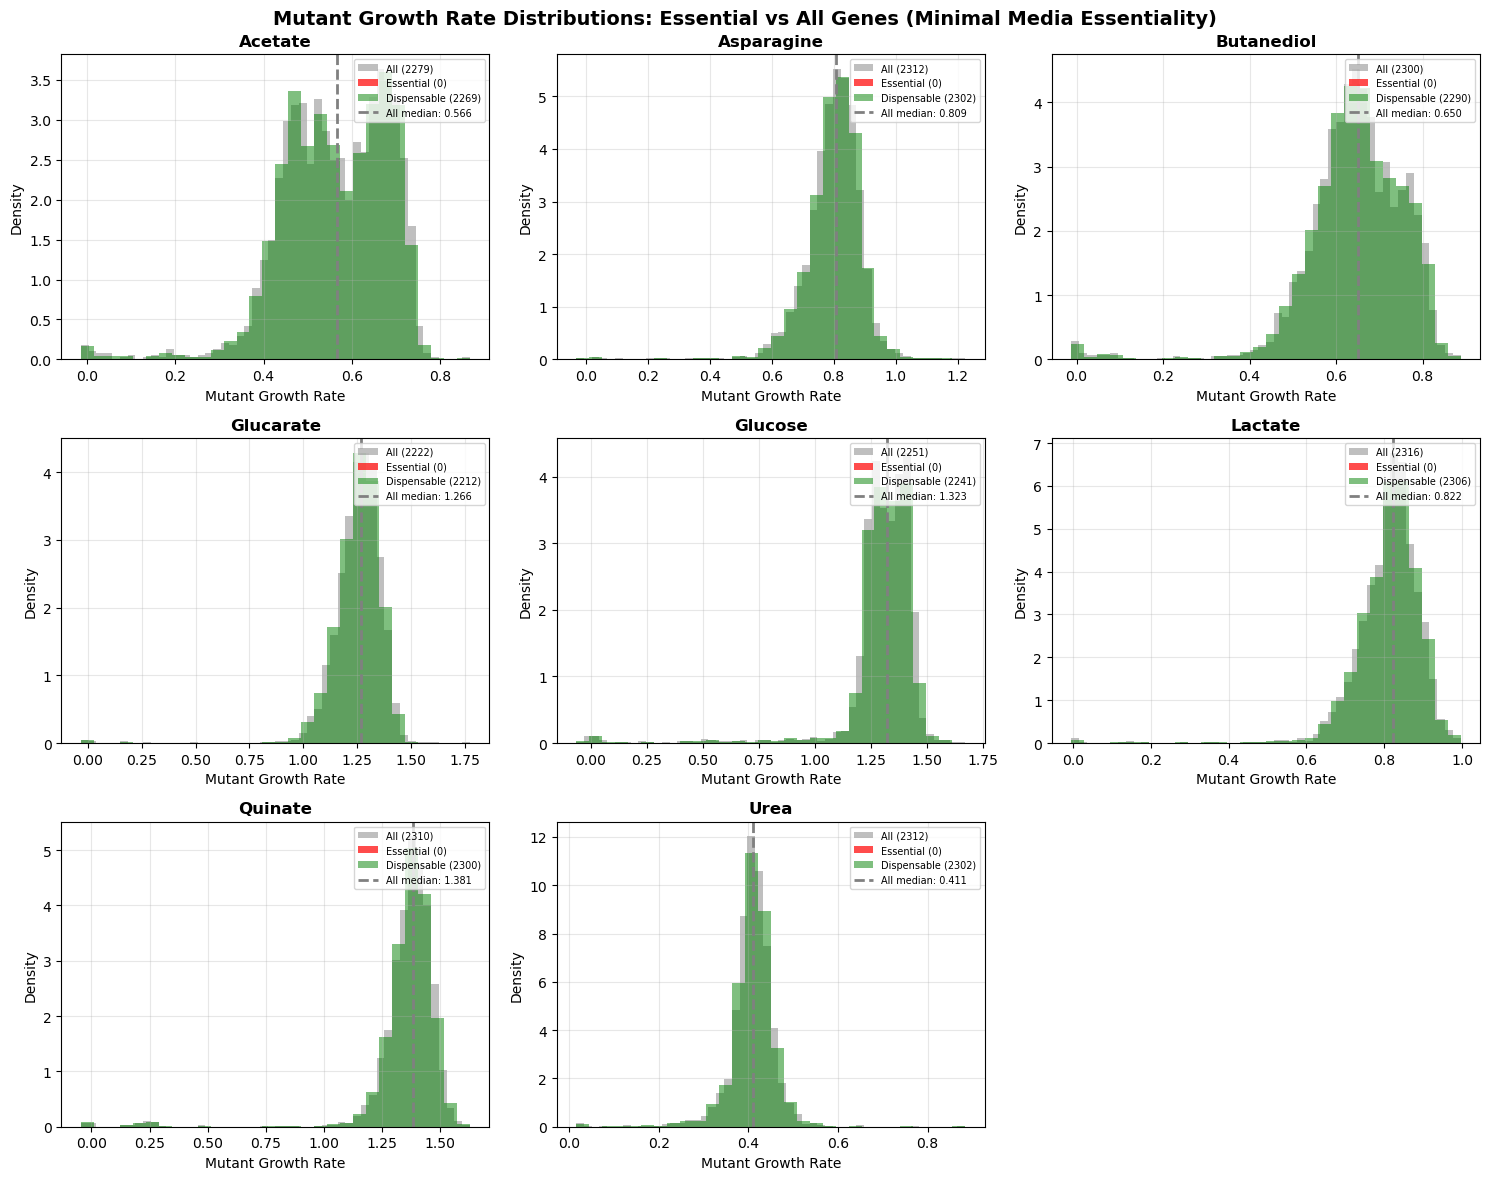


Distribution plots saved to nboutput/essentiality_growth_distributions.png


In [7]:
# Plot distribution of mutant growth rates for essential genes vs all genes
from scipy import stats

conditions = mutant_df.columns.tolist()
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, condition in enumerate(conditions):
    ax = axes[idx]
    
    # Get all growth rate values for this condition
    all_values = mutant_df[condition].dropna()
    
    # Get growth rate values for essential genes (in minimal media)
    essential_genes_in_data = [g for g in essential_minimal if g in mutant_df.index]
    essential_values = mutant_df.loc[essential_genes_in_data, condition].dropna()
    
    # Get growth rate values for dispensable genes
    dispensable_genes_in_data = [g for g in dispensable_minimal if g in mutant_df.index]
    dispensable_values = mutant_df.loc[dispensable_genes_in_data, condition].dropna()
    
    # Plot histograms
    ax.hist(all_values, bins=50, alpha=0.5, color='gray', density=True, label=f'All ({len(all_values)})')
    ax.hist(essential_values, bins=30, alpha=0.7, color='red', density=True, label=f'Essential ({len(essential_values)})')
    ax.hist(dispensable_values, bins=30, alpha=0.5, color='green', density=True, label=f'Dispensable ({len(dispensable_values)})')
    
    # Add vertical lines for medians
    if len(all_values) > 0:
        ax.axvline(all_values.median(), color='gray', linestyle='--', linewidth=2, label=f'All median: {all_values.median():.3f}')
    if len(essential_values) > 0:
        ax.axvline(essential_values.median(), color='red', linestyle='--', linewidth=2, label=f'Ess median: {essential_values.median():.3f}')
    
    ax.set_xlabel('Mutant Growth Rate', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.set_title(f'{condition.capitalize()}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=7, loc='upper right')
    ax.grid(True, alpha=0.3)

# Hide extra subplot
if len(conditions) < len(axes):
    for i in range(len(conditions), len(axes)):
        axes[i].axis('off')

plt.suptitle('Mutant Growth Rate Distributions: Essential vs All Genes (Minimal Media Essentiality)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('nboutput/essentiality_growth_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDistribution plots saved to nboutput/essentiality_growth_distributions.png")

In [ ]:
# Plot distribution for LB essentiality
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, condition in enumerate(conditions):
    ax = axes[idx]
    
    # Get all growth rate values for this condition
    all_values = mutant_df[condition].dropna()
    
    # Get growth rate values for essential genes (in LB)
    essential_genes_in_data = [g for g in essential_lb if g in mutant_df.index]
    essential_values = mutant_df.loc[essential_genes_in_data, condition].dropna()
    
    # Get growth rate values for dispensable genes
    dispensable_genes_in_data = [g for g in dispensable_lb if g in mutant_df.index]
    dispensable_values = mutant_df.loc[dispensable_genes_in_data, condition].dropna()
    
    # Plot histograms
    ax.hist(all_values, bins=50, alpha=0.5, color='gray', density=True, label=f'All ({len(all_values)})')
    ax.hist(essential_values, bins=30, alpha=0.7, color='blue', density=True, label=f'Essential ({len(essential_values)})')
    ax.hist(dispensable_values, bins=30, alpha=0.5, color='green', density=True, label=f'Dispensable ({len(dispensable_values)})')
    
    # Add vertical lines for medians
    if len(all_values) > 0:
        ax.axvline(all_values.median(), color='gray', linestyle='--', linewidth=2)
    if len(essential_values) > 0:
        ax.axvline(essential_values.median(), color='blue', linestyle='--', linewidth=2)
    
    ax.set_xlabel('Mutant Growth Rate', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.set_title(f'{condition.capitalize()}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=7, loc='upper right')
    ax.grid(True, alpha=0.3)

# Hide extra subplot
if len(conditions) < len(axes):
    for i in range(len(conditions), len(axes)):
        axes[i].axis('off')

plt.suptitle('Mutant Growth Rate Distributions: Essential vs All Genes (LB Essentiality)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('nboutput/essentiality_growth_distributions_LB.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nLB Distribution plots saved to nboutput/essentiality_growth_distributions_LB.png")

## 7. Statistical Comparison of Growth Rates

In [ ]:
# Perform statistical tests comparing essential vs dispensable gene growth rates
from scipy.stats import mannwhitneyu, ttest_ind

print("Statistical Comparison: Essential vs Dispensable Gene Growth Rates")
print("=" * 80)

stats_results = {}

for condition in conditions:
    print(f"\n{condition.upper()}:")
    
    # Get values for essential and dispensable genes (minimal media)
    essential_genes_in_data = [g for g in essential_minimal if g in mutant_df.index]
    dispensable_genes_in_data = [g for g in dispensable_minimal if g in mutant_df.index]
    
    essential_values = mutant_df.loc[essential_genes_in_data, condition].dropna()
    dispensable_values = mutant_df.loc[dispensable_genes_in_data, condition].dropna()
    
    if len(essential_values) > 5 and len(dispensable_values) > 5:
        # Mann-Whitney U test (non-parametric)
        stat, pvalue = mannwhitneyu(essential_values, dispensable_values, alternative='two-sided')
        
        # T-test (parametric)
        t_stat, t_pvalue = ttest_ind(essential_values, dispensable_values)
        
        print(f"  Essential genes: n={len(essential_values)}, mean={essential_values.mean():.4f}, median={essential_values.median():.4f}")
        print(f"  Dispensable genes: n={len(dispensable_values)}, mean={dispensable_values.mean():.4f}, median={dispensable_values.median():.4f}")
        print(f"  Mann-Whitney U p-value: {pvalue:.2e}")
        print(f"  T-test p-value: {t_pvalue:.2e}")
        
        stats_results[condition] = {
            "essential_n": len(essential_values),
            "essential_mean": essential_values.mean(),
            "essential_median": essential_values.median(),
            "dispensable_n": len(dispensable_values),
            "dispensable_mean": dispensable_values.mean(),
            "dispensable_median": dispensable_values.median(),
            "mannwhitney_pvalue": pvalue,
            "ttest_pvalue": t_pvalue
        }
    else:
        print(f"  Insufficient data for statistical test")

# Save statistical results
util.save("essentiality_stats_comparison", stats_results)
print("\nStatistical results saved to datacache/essentiality_stats_comparison.json")

In [ ]:
# Create summary table
summary_rows = []

for condition, stats in stats_results.items():
    row = {
        "Condition": condition.capitalize(),
        "Essential (n)": stats["essential_n"],
        "Essential Mean": f"{stats['essential_mean']:.4f}",
        "Essential Median": f"{stats['essential_median']:.4f}",
        "Dispensable (n)": stats["dispensable_n"],
        "Dispensable Mean": f"{stats['dispensable_mean']:.4f}",
        "Dispensable Median": f"{stats['dispensable_median']:.4f}",
        "MW p-value": f"{stats['mannwhitney_pvalue']:.2e}",
        "Significant": "Yes" if stats['mannwhitney_pvalue'] < 0.05 else "No"
    }
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows)
print("\nSummary: Essential vs Dispensable Gene Growth Rates")
print("=" * 100)
display(summary_df)

# Save summary to CSV
summary_df.to_csv('nboutput/essentiality_growth_rate_summary.csv', index=False)
print("\nSummary saved to nboutput/essentiality_growth_rate_summary.csv")

## 8. Box Plot Comparison

In [ ]:
# Create box plots comparing essential vs dispensable gene growth rates
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, condition in enumerate(conditions):
    ax = axes[idx]
    
    # Get values for each category
    essential_genes_in_data = [g for g in essential_minimal if g in mutant_df.index]
    dispensable_genes_in_data = [g for g in dispensable_minimal if g in mutant_df.index]
    uncertain_genes_in_data = [g for g in uncertain_minimal if g in mutant_df.index]
    
    essential_values = mutant_df.loc[essential_genes_in_data, condition].dropna()
    dispensable_values = mutant_df.loc[dispensable_genes_in_data, condition].dropna()
    uncertain_values = mutant_df.loc[uncertain_genes_in_data, condition].dropna()
    
    # Prepare data for box plot
    data_to_plot = [essential_values, uncertain_values, dispensable_values]
    labels = [f'Essential\n(n={len(essential_values)})', 
              f'Uncertain\n(n={len(uncertain_values)})',
              f'Dispensable\n(n={len(dispensable_values)})']
    
    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
    
    # Color the boxes
    colors = ['red', 'orange', 'green']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    
    ax.set_ylabel('Mutant Growth Rate', fontsize=10)
    ax.set_title(f'{condition.capitalize()}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add significance marker if applicable
    if condition in stats_results and stats_results[condition]['mannwhitney_pvalue'] < 0.05:
        ax.text(0.95, 0.95, '*', transform=ax.transAxes, fontsize=20, 
                verticalalignment='top', horizontalalignment='right', color='red')

# Hide extra subplot
if len(conditions) < len(axes):
    for i in range(len(conditions), len(axes)):
        axes[i].axis('off')

plt.suptitle('Mutant Growth Rates by Essentiality Category (Minimal Media)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('nboutput/essentiality_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nBox plots saved to nboutput/essentiality_boxplots.png")
print("* indicates significant difference (p < 0.05) between essential and dispensable genes")

## 9. Summary and Conclusions

In [ ]:
# Final summary
print("\n" + "=" * 80)
print("ESSENTIALITY ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n1. ESSENTIAL GENE COUNTS:")
print(f"   - Essential in Minimal Media: {len(essential_minimal)} genes")
print(f"   - Essential in LB: {len(essential_lb)} genes")
print(f"   - Essential in Both: {len(essential_both)} genes")
print(f"   - Essential in Minimal Only: {len(essential_minimal_only)} genes")
print(f"   - Essential in LB Only: {len(essential_lb_only)} genes")

print(f"\n2. OVERLAP WITH MUTANT GROWTH DATA:")
print(f"   - Total genes in mutant growth data: {len(mutant_genes)}")
print(f"   - Essential (minimal) with growth data: {len(overlap_minimal)} ({100*len(overlap_minimal)/len(essential_minimal):.1f}%)")
print(f"   - Essential (LB) with growth data: {len(overlap_lb)} ({100*len(overlap_lb)/len(essential_lb):.1f}%)")

print(f"\n3. STATISTICAL SIGNIFICANCE:")
significant_conditions = [c for c, s in stats_results.items() if s['mannwhitney_pvalue'] < 0.05]
print(f"   - Conditions with significant difference (p<0.05): {len(significant_conditions)}/{len(stats_results)}")
if significant_conditions:
    print(f"   - Significant conditions: {', '.join(significant_conditions)}")

print(f"\n4. FILES GENERATED:")
print(f"   - datacache/essentiality_gene_lists.json")
print(f"   - datacache/tnseq_parameters.json")
print(f"   - datacache/essentiality_mutant_overlap.json")
print(f"   - datacache/essentiality_stats_comparison.json")
print(f"   - nboutput/essentiality_growth_distributions.png")
print(f"   - nboutput/essentiality_growth_distributions_LB.png")
print(f"   - nboutput/essentiality_boxplots.png")
print(f"   - nboutput/essentiality_growth_rate_summary.csv")

print("\n" + "=" * 80)